## Group data

In [49]:
import numpy as np
import pandas as pd

# Generating a dummy dataset

n = 10000

age_v = 35 + 15 * np.random.randn(n)

economic_status_v = np.random.choice(["Rich", "Middle Class", "Poor"], n)
gender_v = np.random.choice(["Male", "Female"], n)
height = 165 + 30 * np.random.randn(n)
weight = 80 + 25 * np.random.randn(n)
income = 22000 + 6000 * np.random.randn(n)

df_dummy = pd.DataFrame({
    "Age": age_v,
    "Economic Status": economic_status_v,
    "Gender": gender_v,
    "Height": height,
    "Weight": weight,
    "Income": income
})

df_dummy.head(10)

,Age,Economic Status,Gender,Height,Weight,Income
0,21.058638,Rich,Male,111.253261,57.702088,14659.960871
1,19.219548,Rich,Female,184.874581,91.206338,23215.488989
2,66.102986,Middle Class,Male,157.719684,39.756711,23644.928010
3,34.922175,Rich,Male,129.307244,57.437317,27551.671162
4,-3.581958,Middle Class,Female,197.075053,58.151493,24216.084660
5,18.689516,Middle Class,Male,156.150657,106.724771,22431.865648
6,10.065099,Rich,Male,187.744688,73.152778,22580.900301
7,39.276090,Poor,Male,104.940220,90.759998,36171.590803
8,33.049209,Middle Class,Female,177.447023,80.470992,23251.883910
9,34.761891,Poor,Female,147.263907,55.823333,19818.421735


## Group data by columns

In [50]:
grouped_gender = df_dummy.groupby("Gender")

for group, df in grouped_gender:
    print(f"Group: {group}")
    print(f"dataframe: {type(df)}")
    
male_subset = grouped_gender.get_group("Male")
male_subset.head(5)

# Group by two columns

double_group = df_dummy.groupby(["Gender", "Economic Status"])
print(f"Groups: {len(double_group)}")

Group: Female
dataframe: <class 'pandas.core.frame.DataFrame'>
Group: Male
dataframe: <class 'pandas.core.frame.DataFrame'>
Groups: 6


## Agregate data on grouped datasets

In [6]:
grouped_gender["Income"].describe()

grouped_gender["Income"].aggregate(lambda income: np.mean(income) / np.std(income))

grouped_gender.aggregate({
    "Age": np.sum,
    "Income": np.mean,
    "Height": lambda height: np.mean(height) / np.std(height)
})

grouped_gender.aggregate([np.sum, np.std, np.mean])

Age                               Height             \
                  sum        std       mean            sum        std   
Gender                                                                  
Female  172180.516729  15.058412  34.546653  824562.926372  30.157469   
Male    174142.020634  15.172134  34.717309  827969.127213  30.161673   

                           Weight                              Income  \
              mean            sum        std       mean           sum   
Gender                                                                  
Female  165.442000  400493.515505  25.153758  80.355842  1.099956e+08   
Male    165.065615  398811.235773  25.061015  79.507822  1.108648e+08   

                                   
                std          mean  
Gender                             
Female  5981.185686  22069.750159  
Male    5997.727754  22102.239323

## Filter data

In [51]:
grouped_gender["Age"].filter(lambda x: x.sum() >= 100000 ).describe()

grouped_gender[["Age", "Height"]].describe()

Age                                                         \
         count       mean        std        min        25%        50%   
Gender                                                                  
Female  4910.0  35.112443  14.920880 -12.138333  25.015503  35.043593   
Male    5090.0  35.172018  14.916296 -26.838224  25.306297  35.279788   

                              Height                                    \
              75%        max   count        mean        std        min   
Gender                                                                   
Female  45.142025  97.139318  4910.0  164.657154  29.960220  58.664200   
Male    44.943746  86.955887  5090.0  165.429277  29.369017  62.954387   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  144.449330  164.963114  184.569531  276.000358  
Male    145.354872  165.591035  185.206909  281.265139

## Transformations

<class 'pandas.core.frame.DataFrame'>


,Age,Height,Weight,Income
3046,4.157052,-0.686287,0.639796,-0.525298
890,3.608629,-1.312940,0.650634,0.328588
3371,3.471631,0.787173,-1.548493,0.437578
2383,3.319314,-0.119229,-0.772994,0.852298
4534,3.257462,-0.611875,-0.048637,-0.173098


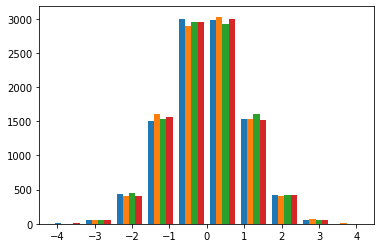

In [55]:
def standardize(x):
    return (x - x.mean()) / x.std()

grouped_gender_standard = grouped_gender.transform(standardize)

import matplotlib.pyplot as plt

print(type(grouped_gender_standard))
plt.hist(grouped_gender_standard)

# get nth item of each group
grouped_gender.nth(33)


# sort rows by column

grouped_gender_standard.sort_values(["Age"], ascending=False).head()



## Training and test dataset

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
# Method 1: using normal distribution

data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

selection = np.random.randn(len(data)) < 0.8

training_df = data[selection]
test_df = data[~selection]

# method 2: using sklearn

training_df, test_df = train_test_split(data, test_size=0.2)

# method 3: using shuffle
shuffled_data = shuffle(data)
training_len = int(len(data) * 0.75)
training_df = data[:training_len]
test_df = data[training_len:]
print(len(test_df))
print(len(training_df))


834
2499
